<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/2OctMezclasGauss_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mezclas Gaussianas

No lo vamos a hacer desde cero

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,3)
plt.style.use('ggplot')

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

Es un conjunto de 4 dimensiones proyectado a 2 y talvez no veamos tan bien las otras dimensiones

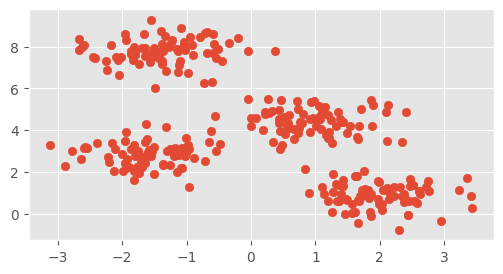

In [ ]:
X,_ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0],X[:,1])

## Criterios de información

Nos dicen el número de grupos más recomendado.
Para determinar un buen valor de k.

a) Akaike

b) Bayesiano


Text(0.5, 0, 'Numero de grupos')

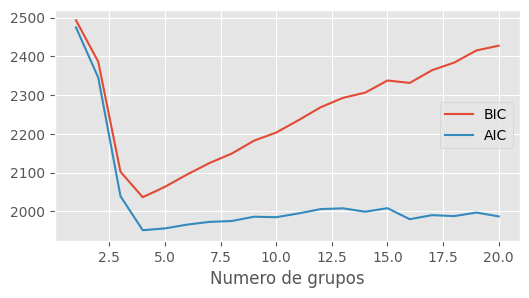

In [ ]:
# numero de clusters:
nc = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in nc] # lista de compresión
# ya estamos obteniendo el modelo entrenado con 1 a 21 grupos para ver cual es el mejor
plt.plot(nc, [m.bic(X) for m in models], label='BIC') # Bayesiano
plt.plot(nc, [m.aic(X) for m in models], label='AIC') # Akaike
plt.legend(loc='best')
plt.xlabel('Numero de grupos')

Vemos que 4 es el número de grupos óptimo

In [ ]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

GaussianMixture(n_components=4)

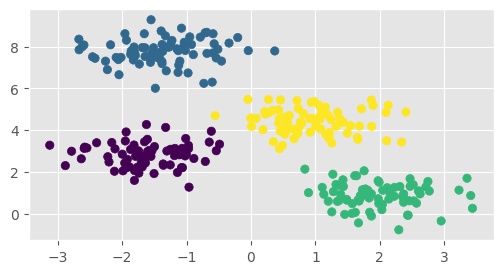

In [ ]:
y_hat = gmm.predict(X)
plt.scatter(X[:,0],X[:,1], c=y_hat)

# Ejemplo 2 MezclasGaussianas:

Vamos a usar el archivo data.npy (esta en Docs PPCD)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
X_train = np.load('data.npy')

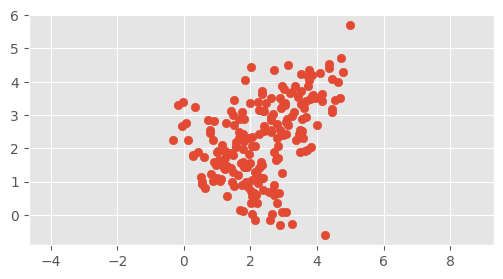

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.axis('equal')
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print('Medias : \n', gmm.means_)
print('Covarianzas : \n', gmm.covariances_)

Medias : 
 [[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]
Covarianzas : 
 [[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


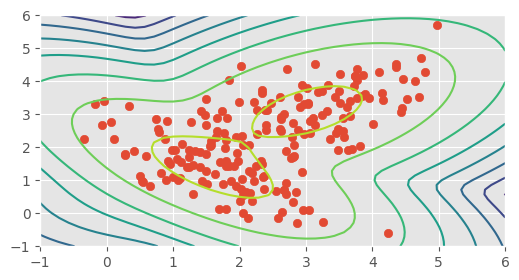

In [ ]:
X,Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T # para pasar un entramado en una sólo dimesión, pegar uno despues de otro
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X,Y,Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

Los puntos que caen fuera de las covarianzas se pueden identificar como puntos anómalos.

Los agrupamientos también nos sirven para encontrar anomalías.

# DBSCAN

Density-based spatial clustering of applications with noise es un algoritmo de agrupamiento de datos.

Creada para encontrar anomalías o puntos con ruido. Hay puntos nucleo, fontera y ruidosos.
*  Núcleo: un cierto umbral de vecinos
*  Fontera: es alcanzable pero no tiene el mínimo de vecinos
*  Anómalo/ruido: No es alcanzable desde un punto núcleo si no de algun punto frontera

Puede generar grupos con geometrías muy complicadas.

No hay que decirle el número de grupos.

Inicia como en un aglomerativo.


## ϵ

Si damos un valor de epsilon muy grande, los grupos van a colapsar a uno.

Si damos un valor de epsilon muy pequeño muchos elementos van a quedar aislados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter

In [ ]:
df = pd.read_csv("https://bit.ly/3arouNg")
df.shape

(6463, 13)

In [ ]:
df.head()

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data = df.iloc[:,1:3]
data.head()

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=20).fit(data)
print(dbscan)

DBSCAN(eps=0.2, min_samples=20)


In [ ]:
print(Counter(dbscan.labels_))
df_aux = pd.DataFrame(data)
print(df_aux[dbscan.labels_==-1])

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


Todas inician en -1 que es donde se agrupan las anomalías. El primer grupo se etiqueta como 1, luego el 2 y así.

Text(0.5, 1.0, 'DBSCAN')

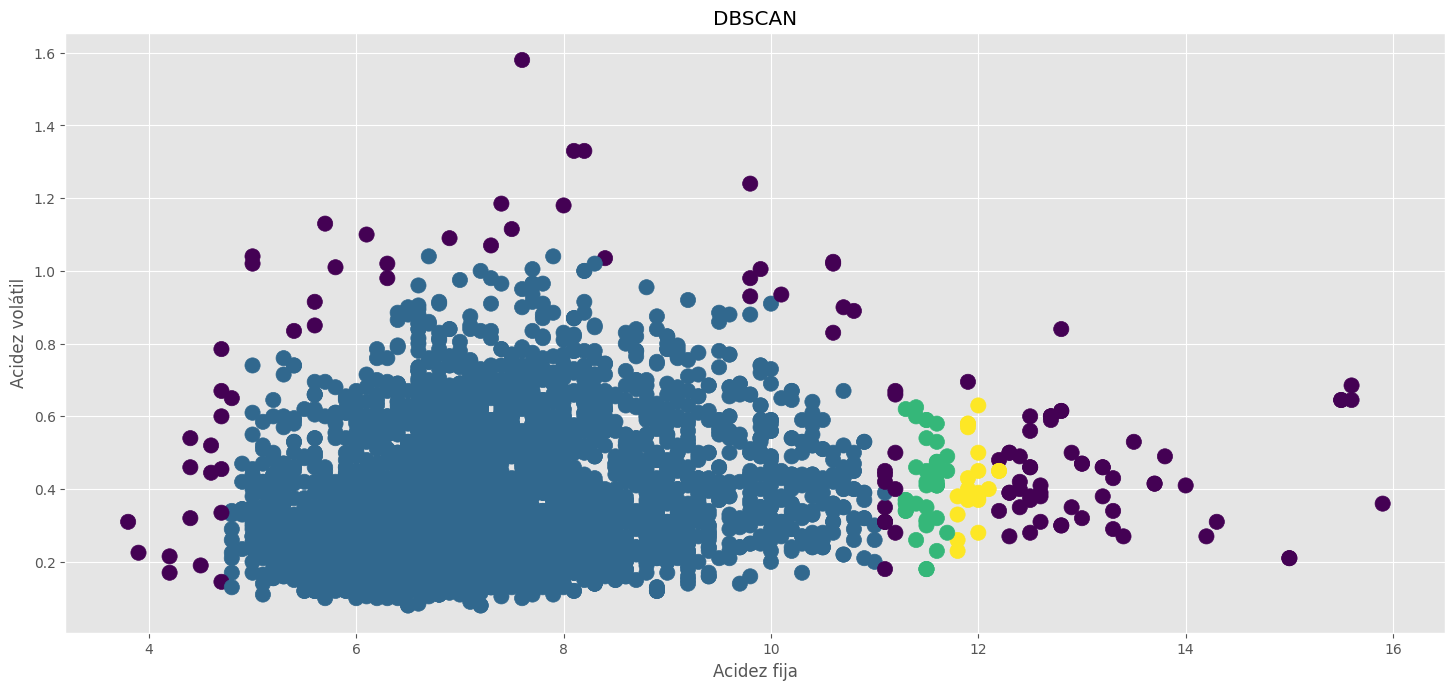

In [ ]:
fig =plt.figure()
ax = fig.add_axes([0.1,0.1,2.3,2])
y_hat = dbscan.labels_
ax.scatter(data.iloc[:,0].values, data.iloc[:,1].values, c=y_hat, s=120)
ax.set_xlabel('Acidez fija')
ax.set_ylabel('Acidez volátil')
plt.title('DBSCAN')

Todos los puntos morados son puntos anómalos.

Sirven para identificar transacciones fraudulentas.

# Tarea: Notas

Hacer tarea de modelos de agrupamiento a iris y digits